<a href="https://colab.research.google.com/github/terryljh/aviation2/blob/main/asrs%20linear%20model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#collect all csvs in one list to read them all into one dataframe
csv_urls = [
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/jan2005-jun2005.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/jul2005-mar2006.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/april2006-november2006.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/december2006-august2007.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/september2007-may2008.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/june2008-february2009.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/march2009-november2009.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/december2009-august2010.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/september2010-may2011.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/june2011-february2012.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/march2012-november2012.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/december2012-august2013.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/september2013-may2014.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/june2014-april2015.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/may2015-january2016.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/february2016-december2016.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/january2017-november2017.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/december2017-october2018.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/november2018-july2019.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/august2019-may2020.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/june2020-april2021.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/may2021-apr2022.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/may2022-mar2023.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/apr2023-mar2024.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/apr2024-dec2025.csv']
    #this code usually takes about 15-30 seconds to read in all csv's
df = pd.concat([pd.read_csv(url) for url in csv_urls], ignore_index=True)
pd.set_option('display.max_columns', None)
new_headers = df.iloc[0] #dataset has headers, then the first row is the actual headings,
#so we want to replace headers with the first row new_headers

#removes anomolous dates that are in by mistake, should only be April 2024-May 2025

# Make the headers unique, in case some are repeated, function relabels 2,3 etc
#The ASRS occasionally has multiple reports for a single incident
#If we want to include second,third reports in our data, we need to include the
#second version of those columns too, but for simplicity maybe we only take the
#first report of each incident for now?
def make_unique(headers):
    counts = {}
    unique_headers = []
    for col in headers:
        if col in counts:
            counts[col] += 1
            unique_headers.append(f"{col}_{counts[col]}")
        else:
            counts[col] = 0
            unique_headers.append(col)
    return unique_headers
unique_headers = make_unique(new_headers)

df.columns = unique_headers
df = df.iloc[1:].reset_index(drop=True) #remove unnecessary first row

df['Date']= df['Date'].values
df['Date'] = pd.to_numeric(df['Date'], errors='coerce')
#the date column is of type string, we change to integer so we can manipulate it
#errors='coerce' will return NaN if not a number

# make normalized column from state ref column  where:
# make all upper case
# strip leading or trailing white space

df['Normalized'] = df['State Reference'].str.upper().str.strip()

#Define U.S. state abbreviations (includes DC)
us_states = {
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'DC'
}

#Define set of ISO alpha-2 country codes
country_codes = {
    'AD', 'AE', 'AF', 'AG', 'AI', 'AL', 'AM', 'AO', 'AQ', 'AR', 'AS', 'AT', 'AU', 'AW', 'AX', 'AZ',
    'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BL', 'BM', 'BN', 'BO', 'BQ', 'BR', 'BS', 'BT', 'BV', 'BW', 'BY', 'BZ',
    'CA', 'CC', 'CD', 'CF', 'CG', 'CH', 'CI', 'CK', 'CL', 'CM', 'CN', 'CO', 'CR', 'CU', 'CV', 'CW', 'CX', 'CY', 'CZ',
    'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'EH', 'ER', 'ES', 'ET',
    'FI', 'FJ', 'FM', 'FO', 'FR','GA', 'GB', 'GD', 'GE', 'GF', 'GG', 'GH', 'GI', 'GL', 'GM', 'GN', 'GP', 'GQ', 'GR', 'GT', 'GU', 'GW', 'GY',
    'HK', 'HM', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IM', 'IN', 'IO', 'IQ', 'IR', 'IS', 'IT',
    'JE', 'JM', 'JO', 'JP','KE', 'KG', 'KH', 'KI', 'KM', 'KN', 'KP', 'KR', 'KW', 'KY', 'KZ',
    'LA', 'LB', 'LC', 'LI', 'LK', 'LR', 'LS', 'LT', 'LU', 'LV', 'LY',
    'MA', 'MC', 'MD', 'ME', 'MF', 'MG', 'MH', 'MK', 'ML', 'MM', 'MN', 'MO', 'MP', 'MQ', 'MR', 'MS', 'MT', 'MU', 'MV', 'MW', 'MX', 'MY', 'MZ',
    'NA', 'NC', 'NE', 'NF', 'NG', 'NI', 'NL', 'NO', 'NP', 'NR', 'NU', 'NZ', 'OM','PA', 'PE', 'PF', 'PG', 'PH', 'PK', 'PL', 'PM', 'PN', 'PR', 'PT', 'PW', 'PY',
    'QA', 'RE', 'RO', 'RS', 'RU', 'RW', 'SA', 'SB', 'SC', 'SD', 'SE', 'SG', 'SH', 'SI', 'SJ', 'SK', 'SL', 'SM', 'SN', 'SO', 'SR', 'SS', 'ST', 'SV', 'SX', 'SY', 'SZ',
    'TC', 'TD', 'TF', 'TG', 'TH', 'TJ', 'TK', 'TL', 'TM', 'TN', 'TO', 'TR', 'TT', 'TV', 'TZ',
    'UA', 'UG', 'UM', 'US', 'UY', 'UZ', 'VA', 'VC', 'VE', 'VG', 'VI', 'VN', 'VU', 'WF', 'WS', 'YE', 'YT', 'ZA', 'ZM', 'ZW'
}


In [29]:
# make a copy of cleaned data
df_cleaned = df.copy()

#  Initial classification of State, Country or 'State or Country' or Unknown
df_cleaned['Is_State'] = df_cleaned['Normalized'].isin(us_states)
df_cleaned['Is_Country'] = df_cleaned['Normalized'].isin(country_codes)
df_cleaned['Is_Ambiguous'] = df_cleaned['Is_State'] & df_cleaned['Is_Country']

def classify_abbreviation(row):
    if row['Is_Ambiguous']:
        return 'State or Country'
    elif row['Is_State']:
        return 'State'
    elif row['Is_Country']:
        return 'Country'
    else:
        return 'Unknown'

df_cleaned['Abbreviation_Type'] = df_cleaned.apply(classify_abbreviation, axis=1)

# Filter only valid 2-character abbreviations
df_cleaned['Length_Valid'] = df_cleaned['Normalized'].str.len() == 2
df_final = df_cleaned[df_cleaned['Length_Valid']].copy()

# Load airport codes from FreightPaul featured freight airport code system (IATA)
airport_codes = pd.read_csv("https://github.com/terryljh/aviation2/raw/refs/heads/main/airports.csv")

# Extract 3-letter airport code from Locale Reference
df_final.loc[:, 'Airport_Code'] = df_final['Locale Reference'].str[:3]

# Update ambiguous or unknown using airport data
needs_update = df_final['Abbreviation_Type'].isin(['Unknown', 'State or Country'])
df_to_update = df_final[needs_update].copy()

df_to_update = df_to_update.merge(
    airport_codes[['abrv', 'Code']],
    left_on='Airport_Code',
    right_on='abrv',
    how='left'
)

def resolve_from_airport(row):
    if pd.isna(row['Code']):
        return row['Abbreviation_Type']
    elif row['Code'] == 'US':
        return 'State'
    else:
        return 'Country'

df_to_update['Resolved_Type'] = df_to_update.apply(resolve_from_airport, axis=1)

# Update back into df_final
for idx, row in df_to_update.iterrows():
    df_final.loc[idx, 'Abbreviation_Type'] = row['Resolved_Type']

# Safeguard — always treat 'US' as a country
df_final.loc[df_final['Normalized'] == 'US', 'Abbreviation_Type'] = 'Country'
df_final.loc[df_final['State Reference'].str.strip().str.upper() == 'US', 'Abbreviation_Type'] = 'Country'

# apply fallback logic to any rows still ambiguous
still_uncertain = df_final['Abbreviation_Type'].isin(['State or Country', 'Unknown'])

def final_disambiguation(code):
    if code in us_states:
        return 'State'
    elif code in country_codes:
        return 'Country'
    else:
        return 'Unknown'

df_final.loc[still_uncertain, 'Abbreviation_Type'] = df_final.loc[still_uncertain, 'Normalized'].apply(final_disambiguation)

#output_path = ""C:\Users\dellx\Desktop\airport-codes.csv""
#df_final.to_csv(output_path, index=False)
#print(f" Final cleaned file saved to: {output_path}")

#print(df_final['Abbreviation_Type'].value_counts())

#there were some Canadian abbrevations that weren't in the original country codes so they were made outted to all be labeled as "Country"

# Define Canadian province abbreviations to treat as countries
canadian_provinces = {'ON', 'AB', 'BC', 'PQ', 'NB', 'MB', 'NS'}

#file_path = "C:/Users/steph/Downloads/final_state_country_with_airports.csv"
#df = pd.read_csv(file_path)

# Normalize again just in case
df_final['Normalized'] = df_final['Normalized'].str.upper().str.strip()

df_final.loc[df_final['Normalized'].isin(canadian_provinces), 'Abbreviation_Type'] = 'Country'

#df_final.to_csv(file_path, index=False)
#print(f" Updated Canadian provinces labeled as 'Country' and saved to: {file_path}")

def clean_far_part(value):
    if pd.isna(value):
        return value
    parts = [p.strip() for p in str(value).split(';')]
    unique_parts = sorted(set(parts))
    return '; '.join(unique_parts)

df_final['Operating Under FAR Part'] = df_final['Operating Under FAR Part'].apply(clean_far_part)

df_final['Light'] = df_final['Light'].apply(clean_far_part)

def fix_conflicting_light_entries(df, column='Light'):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 'Day' if isinstance(x, str) and 'day' in x.lower() and 'night' in x.lower() else x)
    return df

def replace_exact_day_with_daylight(df, column='Light'):
    df = df.copy()
    df[column] = df[column].apply(
        lambda x: 'Daylight' if x == 'Day' else x
    )
    return df

def replace_a_semicolon_b_with_a(df, column='Light'):
    df = df.copy()
    df[column] = df[column].apply(
        lambda x: x.split(';')[0].strip() if isinstance(x, str) and ';' in x else x
    )
    return df

df_final = fix_conflicting_light_entries(df_final, column='Light')
df_final = replace_exact_day_with_daylight(df_final, column='Light')
df_final = replace_a_semicolon_b_with_a(df_final, column='Light')

#counts = df_final['Operating Under FAR Part'].value_counts()
#low_freq_labels = counts[counts < 1000].index
#df_final['Operating Under FAR Part'] = df_final['Operating Under FAR Part'].replace(low_freq_labels, 'Other')

dfsubset = df_final[['Date', 'Normalized', 'Abbreviation_Type', 'Locale Reference', 'State Reference', 'Operating Under FAR Part','Mission','Light', 'Flight Phase','Function', 'Contributing Factors / Situations', 'Primary Problem']]
dfsubset=dfsubset.copy()
dfsubset = dfsubset[(dfsubset['Date']//100 >= 2004) & (dfsubset['Date']//100 <= 2026)]
# there are accidentally some lines where the year is 0 BC, so we remove them


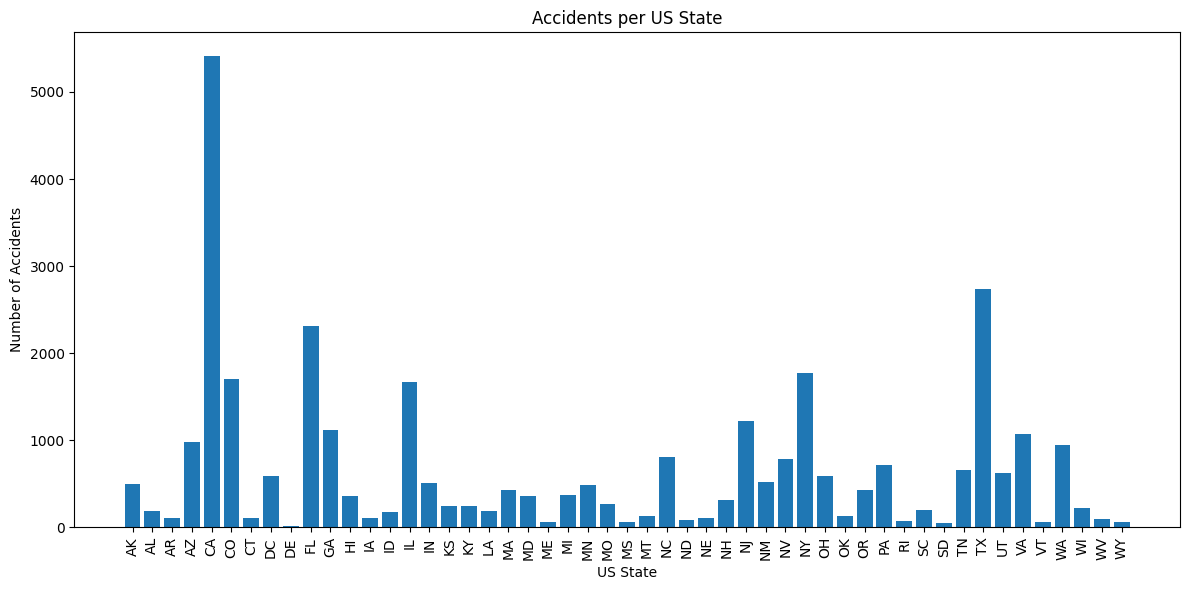

In [ ]:
# Barplot with Number of Accidents per US state

df_filtered = dfsubset[dfsubset['Abbreviation_Type']=='State']

grouped = df_filtered.groupby('Normalized').size().reset_index(name='Accident_Count')

import matplotlib.pyplot

plt.figure(figsize = (12, 6))
plt.bar(grouped['Normalized'], grouped['Accident_Count'])
plt.xticks(rotation=90)
plt.xlabel('US State')
plt.ylabel('Number of Accidents')
plt.title('Accidents per US State')
plt.tight_layout()
plt.show()

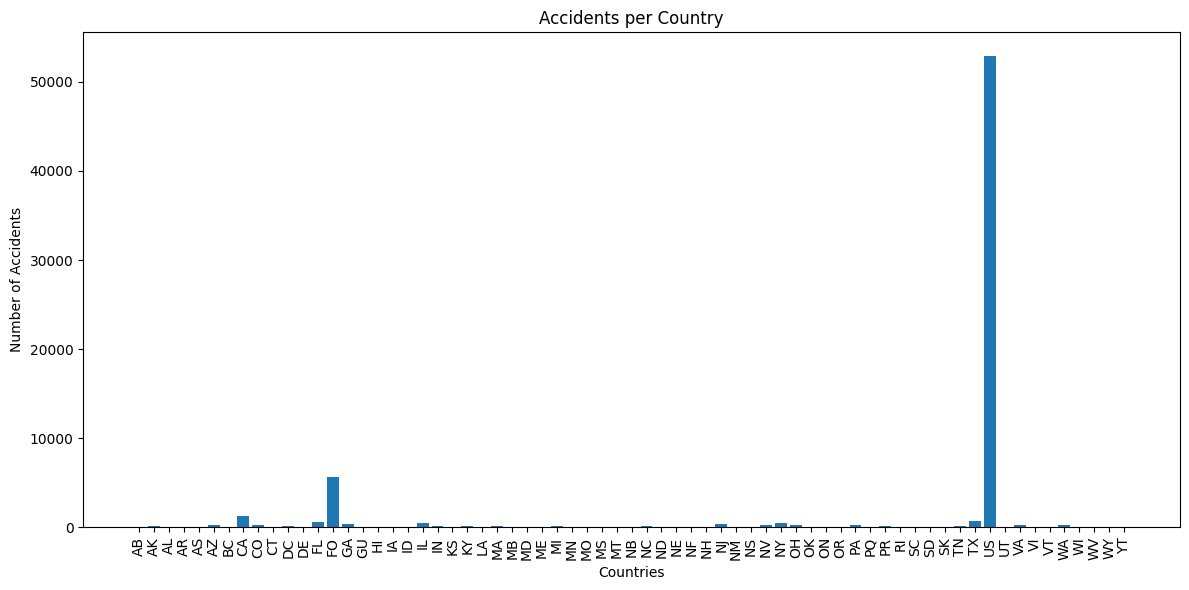

In [ ]:
# Barplot with Number of Accidents per Country

df_filtered = dfsubset[dfsubset['Abbreviation_Type']=='Country']

grouped = df_filtered.groupby('Normalized').size().reset_index(name='Accident_Count')

import matplotlib.pyplot

plt.figure(figsize = (12, 6))
plt.bar(grouped['Normalized'], grouped['Accident_Count'])
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Number of Accidents')
plt.title('Accidents per Country')
plt.tight_layout()
plt.show()

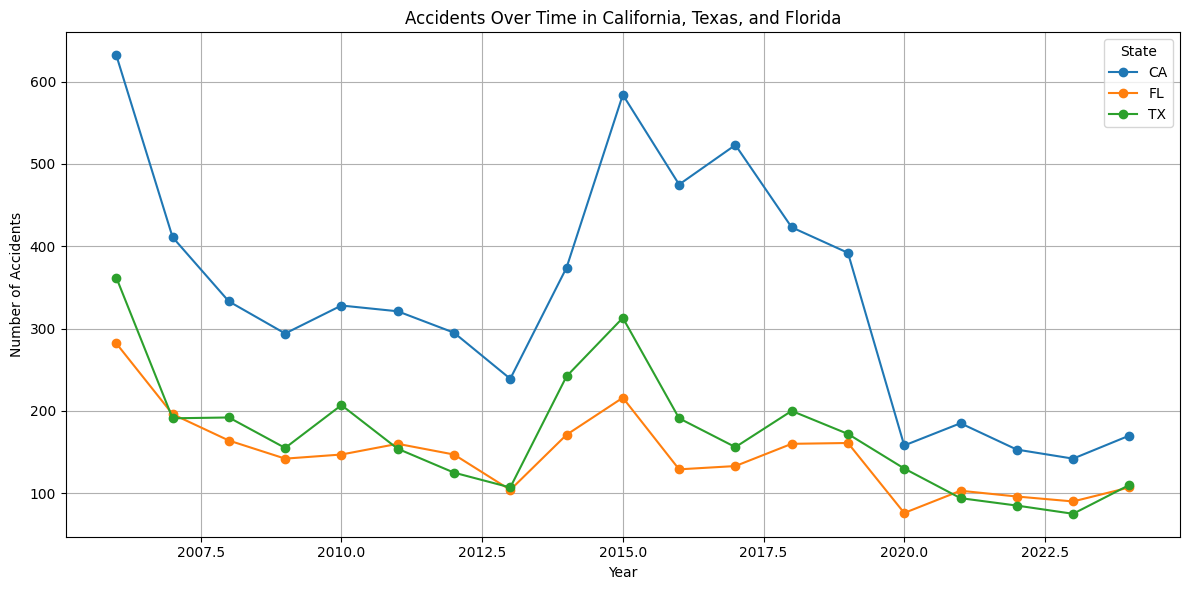

In [ ]:
#scatterplot for accidents over time in top 3 states with accidents: California, Texas, and Florida
import pandas as pd
import matplotlib.pyplot as plt

#year column creation
dfsubset2 = df_final.copy()
dfsubset2['Date'] = pd.to_numeric(dfsubset2['Date'], errors='coerce')
dfsubset2 = dfsubset2[(dfsubset2['Date'] // 100 >= 2006) & (dfsubset2['Date'] // 100 <= 2024)]
dfsubset2['Year'] = dfsubset2['Date'] // 100

# number of accidents per year
yearly_counts = dfsubset2.groupby('Year').size().reset_index(name='Accident_Count')

#Line plot of CA, TX, FL
top_states = ['CA', 'TX', 'FL']
df_states = dfsubset2[dfsubset2['Normalized'].isin(top_states)]

# Group by year and state
grouped_states = df_states.groupby(['Year', 'Normalized']).size().reset_index(name='Accident_Count')
pivoted = grouped_states.pivot(index='Year', columns='Normalized', values='Accident_Count')

# Line plot
pivoted.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Accidents Over Time in California, Texas, and Florida')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.legend(title='State')
plt.show()



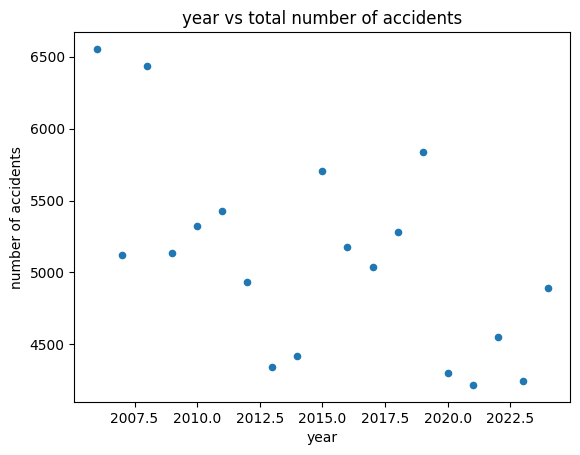

                            OLS Regression Results                            
Dep. Variable:         Accident_Count   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     6.596
Date:                Sat, 14 Jun 2025   Prob (F-statistic):             0.0234
Time:                        03:29:38   Log-Likelihood:                -109.86
No. Observations:                  15   AIC:                             223.7
Df Residuals:                      13   BIC:                             225.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.061e+05   3.94e+04      2.693      0.0

In [ ]:
dfsubset2 = dfsubset[(dfsubset['Date']//100 >= 2006) & (dfsubset['Date']//100 <= 2024)]
#for the yearly counts, we cannot include 2025, because the data is not complete
#we do not include 2005 because anonymised reporting began in 2006
yearly_counts = dfsubset2.groupby(dfsubset2['Date']//100).size().reset_index(name='Accident_Count')
yearly_counts.plot.scatter(x='Date', y='Accident_Count')
plt.title('year vs total number of accidents')
plt.xlabel('year')
plt.ylabel('number of accidents')
plt.show()

from sklearn.model_selection import train_test_split

X, y = yearly_counts[['Date']], yearly_counts['Accident_Count']

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=0.2, random_state=945)

from sklearn.linear_model import LinearRegression
slryearly = LinearRegression()
slryearly.fit(X_train,y_train)

#re-doing the above with sm so we can use model summary
#decreasing trend but unreliable p-value
import statsmodels.api as sm
dfsubset2 = dfsubset[(dfsubset['Date']//100 >= 2006) & (dfsubset['Date']//100 <= 2024)]
yearly_counts = dfsubset2.groupby(dfsubset2['Date']//100).size().reset_index(name='Accident_Count')
yearly_counts.rename(columns={yearly_counts.columns[0]: 'Year'}, inplace=True)
X = sm.add_constant(yearly_counts['Year'])
y = yearly_counts['Accident_Count']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=945)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

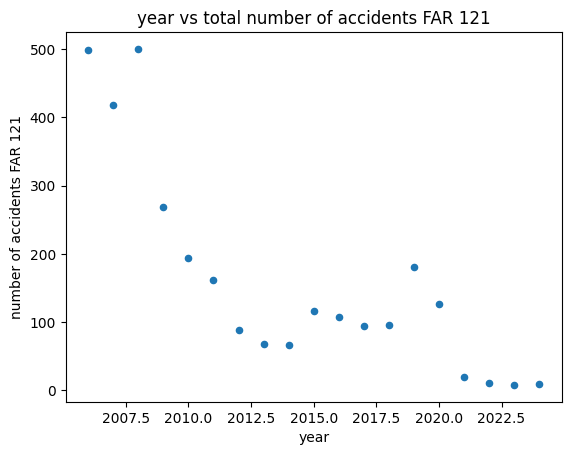

                            OLS Regression Results                            
Dep. Variable:         Accident_Count   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     31.85
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           8.02e-05
Time:                        22:45:12   Log-Likelihood:                -82.021
No. Observations:                  15   AIC:                             168.0
Df Residuals:                      13   BIC:                             169.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.486e+04   6156.275      5.663      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [66]:
dfsubset2 = dfsubset[(dfsubset['Date']//100 >= 2006) & (dfsubset['Date']//100 <= 2024)]

dfsubset2 = dfsubset2[dfsubset2['Operating Under FAR Part'] == 'Part 121']
#dfsubset2 = dfsubset2[dfsubset2['Primary Problem'] == 'Human Factors']
#dfsubset2 = dfsubset2[dfsubset2['Primary Problem'] == 'Aircraft']
#dfsubset2 = dfsubset2[dfsubset2['Primary Problem'] == 'Procedure']
#dfsubset2 = dfsubset2[dfsubset2['Primary Problem'] == 'Weather']
dfsubset2 = dfsubset2[dfsubset2['Primary Problem'] == 'Company Policy']
#dfsubset2 = dfsubset2[dfsubset2['Primary Problem'] == 'Chart Or Publication']
#dfsubset2 = dfsubset2[dfsubset2['Primary Problem'] == 'Airspace Structure']
#dfsubset2 = dfsubset2[dfsubset2['Primary Problem'] == 'Ambiguous']
#dfsubset2 = dfsubset2[dfsubset2['Primary Problem'] == 'Environment - Non Weather Related']
#dfsubset2 = dfsubset2[dfsubset2['Primary Problem'] == 'Software and Automation']
#dfsubset2 = dfsubset2[dfsubset2['Primary Problem'] == 'ATC Equipment / Nav Facility / Buildings']
yearly_counts = dfsubset2.groupby(dfsubset2['Date']//100).size().reset_index(name='Accident_Count')
yearly_counts.plot.scatter(x='Date', y='Accident_Count')
plt.title('year vs total number of accidents FAR 121')
plt.xlabel('year')
plt.ylabel('number of accidents FAR 121')
plt.show()

from sklearn.model_selection import train_test_split

X, y = yearly_counts[['Date']], yearly_counts['Accident_Count']

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=0.2, random_state=945)

from sklearn.linear_model import LinearRegression
slryearly = LinearRegression()
slryearly.fit(X_train,y_train)

#re-doing the above with sm so we can use model summary
#decreasing trend but unreliable p-value
import statsmodels.api as sm
yearly_counts = dfsubset2.groupby(dfsubset2['Date']//100).size().reset_index(name='Accident_Count')
yearly_counts.rename(columns={yearly_counts.columns[0]: 'Year'}, inplace=True)
X = sm.add_constant(yearly_counts['Year'])
y = yearly_counts['Accident_Count']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=945)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

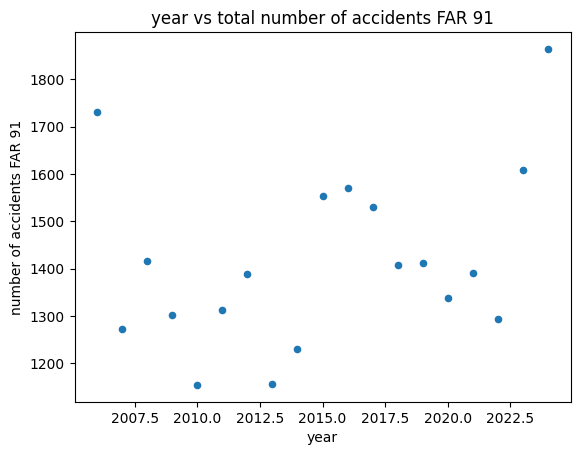

                            OLS Regression Results                            
Dep. Variable:         Accident_Count   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     7.685
Date:                Fri, 13 Jun 2025   Prob (F-statistic):             0.0159
Time:                        22:31:14   Log-Likelihood:                -95.347
No. Observations:                  15   AIC:                             194.7
Df Residuals:                      13   BIC:                             196.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.008e+04    1.5e+04     -2.678      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
dfsubset2 = dfsubset[(dfsubset['Date']//100 >= 2006) & (dfsubset['Date']//100 <= 2024)]

dfsubset2 = dfsubset2[dfsubset2['Operating Under FAR Part'] == 'Part 91']
yearly_counts = dfsubset2.groupby(dfsubset2['Date']//100).size().reset_index(name='Accident_Count')
yearly_counts.plot.scatter(x='Date', y='Accident_Count')
plt.title('year vs total number of accidents FAR 91')
plt.xlabel('year')
plt.ylabel('number of accidents FAR 91')
plt.show()

from sklearn.model_selection import train_test_split

X, y = yearly_counts[['Date']], yearly_counts['Accident_Count']

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=0.2, random_state=945)

from sklearn.linear_model import LinearRegression
slryearly = LinearRegression()
slryearly.fit(X_train,y_train)

#re-doing the above with sm so we can use model summary
#decreasing trend but unreliable p-value
import statsmodels.api as sm
yearly_counts = dfsubset2.groupby(dfsubset2['Date']//100).size().reset_index(name='Accident_Count')
yearly_counts.rename(columns={yearly_counts.columns[0]: 'Year'}, inplace=True)
X = sm.add_constant(yearly_counts['Year'])
y = yearly_counts['Accident_Count']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=945)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

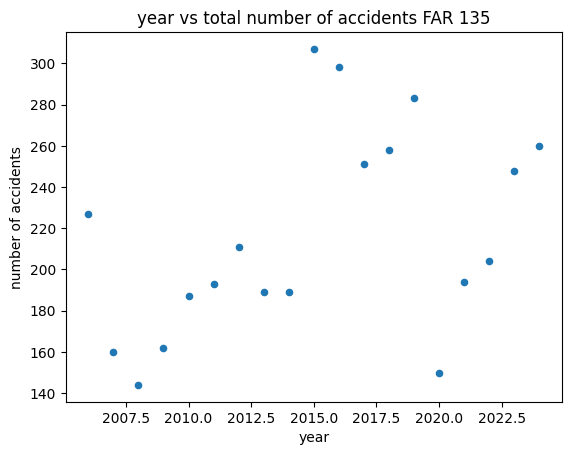

                            OLS Regression Results                            
Dep. Variable:         Accident_Count   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2.161
Date:                Fri, 13 Jun 2025   Prob (F-statistic):              0.165
Time:                        22:31:25   Log-Likelihood:                -78.087
No. Observations:                  15   AIC:                             160.2
Df Residuals:                      13   BIC:                             161.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6742.8475   4735.762     -1.424      0.1

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
dfsubset2 = dfsubset[(dfsubset['Date']//100 >= 2006) & (dfsubset['Date']//100 <= 2024)]

dfsubset2 = dfsubset2[dfsubset2['Operating Under FAR Part'] == 'Part 135']
yearly_counts = dfsubset2.groupby(dfsubset2['Date']//100).size().reset_index(name='Accident_Count')
yearly_counts.plot.scatter(x='Date', y='Accident_Count')
plt.title('year vs total number of accidents FAR 135')
plt.xlabel('year')
plt.ylabel('number of accidents')
plt.show()

from sklearn.model_selection import train_test_split

X, y = yearly_counts[['Date']], yearly_counts['Accident_Count']

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=0.2, random_state=945)

from sklearn.linear_model import LinearRegression
slryearly = LinearRegression()
slryearly.fit(X_train,y_train)

#re-doing the above with sm so we can use model summary
#decreasing trend but unreliable p-value
import statsmodels.api as sm
yearly_counts = dfsubset2.groupby(dfsubset2['Date']//100).size().reset_index(name='Accident_Count')
yearly_counts.rename(columns={yearly_counts.columns[0]: 'Year'}, inplace=True)
X = sm.add_constant(yearly_counts['Year'])
y = yearly_counts['Accident_Count']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=945)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

In [ ]:
#model with only months as categorical variables and year as feature shows clear decreasing accident trend over year
import statsmodels.api as sm
dfsubset2 = dfsubset[(dfsubset['Date']//100 >= 2006) & (dfsubset['Date']//100 <= 2024)]
dfsubset2=dfsubset2.copy()
dfsubset2['Year'] = dfsubset2['Date']//100
dfsubset2['Month'] = dfsubset2['Date']%100
dfsubset2['Year'] = dfsubset2['Year'] - dfsubset2['Year'].mean()

grouped = dfsubset2.groupby(['Year', 'Month']).size().reset_index(name='count')

dfsubset2['Human_Factors'] = dfsubset2['Primary Problem'] == 'Human Factors'
hf_by_month = dfsubset2.groupby(['Year', 'Month'])['Human_Factors'].mean().reset_index(name='pct_human_factors')
hftotal_by_month = dfsubset2.groupby(['Year', 'Month'])['Human_Factors'].sum().reset_index(name='total_hf')

dfsubset2['Aircraft'] = dfsubset2['Primary Problem'] == 'Aircraft'
aircraft_by_month = dfsubset2.groupby(['Year', 'Month'])['Aircraft'].mean().reset_index(name='pct_Aircraft')
aircrafttotal_by_month = dfsubset2.groupby(['Year', 'Month'])['Aircraft'].sum().reset_index(name='total_Aircraft')


grouped['Month'] = grouped['Month'].astype(int)

month_dummies = pd.get_dummies(grouped['Month'], prefix='Month', drop_first=True)

grouped['Year'] = pd.to_numeric(grouped['Year'], errors='coerce')

grouped = grouped.merge(hf_by_month, on=['Year', 'Month']).merge(aircraft_by_month, on=['Year', 'Month']).merge(aircrafttotal_by_month, on=['Year', 'Month']).merge(hftotal_by_month, on=['Year', 'Month'])

X = pd.concat([grouped[['Year']].astype(float), month_dummies.astype(float)], axis=1)
y = grouped['count'].astype(float)

X = X.apply(pd.to_numeric, errors='coerce').dropna()
y = y.loc[X.index]
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=945)
#monthmodel = LinearRegression()
#monthmodel.fit(X_train,y_train)

X_train = sm.add_constant(X_train, prepend=False)

monthmodel2 = sm.OLS(y_train, X_train).fit()
print(monthmodel2.summary())

from scipy.stats import pearsonr
r, p = pearsonr(grouped['Year'].values, grouped['pct_human_factors'].values)
print(f"Correlation for pct human factors: {r}, p-value: {p}")
r, p = pearsonr(grouped['Year'].values, grouped['pct_Aircraft'].values)
print(f"Correlation for pct aircraft: {r}, p-value: {p}")
r, p = pearsonr(grouped['Year'].values, grouped['total_hf'].values)
print(f"Correlation for total human factors: {r}, p-value: {p}")
r, p = pearsonr(grouped['Year'].values, grouped['total_Aircraft'].values)
print(f"Correlation for total aircraft: {r}, p-value: {p}")

grouped[['Year', 'pct_human_factors', 'pct_Aircraft', 'total_Aircraft','total_hf']].corr()




                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     4.960
Date:                Fri, 13 Jun 2025   Prob (F-statistic):           5.15e-07
Time:                        23:53:53   Log-Likelihood:                -1042.5
No. Observations:                 182   AIC:                             2111.
Df Residuals:                     169   BIC:                             2153.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year          -6.0155      1.060     -5.674      0.0

,Year,pct_human_factors,pct_Aircraft,total_Aircraft,total_hf
Year,1.000000,-0.328891,0.177822,-0.115411,-0.441645
pct_human_factors,-0.328891,1.000000,-0.533525,-0.183957,0.815271
pct_Aircraft,0.177822,-0.533525,1.000000,0.652722,-0.483304
total_Aircraft,-0.115411,-0.183957,0.652722,1.000000,0.193091
total_hf,-0.441645,0.815271,-0.483304,0.193091,1.000000


In [ ]:

import statsmodels.api as sm

dfsubset2 = dfsubset[(dfsubset['Date']//100 >= 2006) & (dfsubset['Date']//100 <= 2024)]
dfsubset2=dfsubset2.copy()
dfsubset2['Year'] = dfsubset2['Date']//100
dfsubset2['Month'] = dfsubset2['Date']%100
dfsubset2['Year'] = dfsubset2['Year'] - dfsubset2['Year'].mean()

dfsubset2 = dfsubset2[dfsubset2['Operating Under FAR Part'] == 'Part 121']

dfsubset2['Human_Factors'] = dfsubset2['Primary Problem'] == 'Human Factors'
hf_by_month = dfsubset2.groupby(['Year', 'Month'])['Human_Factors'].mean().reset_index(name='pct_human_factors')
hftotal_by_month = dfsubset2.groupby(['Year', 'Month'])['Human_Factors'].sum().reset_index(name='total_hf')

dfsubset2['Aircraft'] = dfsubset2['Primary Problem'] == 'Aircraft'
aircraft_by_month = dfsubset2.groupby(['Year', 'Month'])['Aircraft'].mean().reset_index(name='pct_Aircraft')
aircrafttotal_by_month = dfsubset2.groupby(['Year', 'Month'])['Aircraft'].sum().reset_index(name='total_Aircraft')

#dfsubset2['Operating Under FAR Part'] = dfsubset2['Operating Under FAR Part'].astype(str)
#dfsubset2['Operating Under FAR Part'] = dfsubset2['Operating Under FAR Part'].apply(
#    lambda x: '; '.join(sorted(set([part.strip() for part in x.split(';')]))))
#there are some entries like 121;121 and 91;91, this cleans them to just 121 or 91

def clean_far_part(value):
    if pd.isna(value):
        return value
    parts = [p.strip() for p in str(value).split(';')]
    unique_parts = sorted(set(parts))
    return '; '.join(unique_parts)

dfsubset2['Operating Under FAR Part'] = dfsubset2['Operating Under FAR Part'].apply(clean_far_part)

#def is_unambiguous(value):
#    if pd.isna(value):
#        return False
#    parts = [p.strip() for p in str(value).split(';')]
#    return len(set(parts)) == 1
#
#dfsubset2 = dfsubset2[dfsubset2['Operating Under FAR Part'].apply(is_unambiguous)].copy()

#counts = dfsubset2['Operating Under FAR Part'].value_counts()
#low_freq_labels = counts[counts < 1000].index
#dfsubset2['Operating Under FAR Part'] = dfsubset2['Operating Under FAR Part'].replace(low_freq_labels, 'Other')
#dfsubset2 = dfsubset2[dfsubset2['Operating Under FAR Part'].isin(['Part 121', 'Part 135','Part 91'])].reset_index(drop=True)

#far_by_month = dfsubset2.groupby(['Year', 'Month'])['FAR_121'].mean().reset_index(name='pct_far121')
#we don't include this in the model because commerical is the baseline

#dfsubset2['FAR_91'] = dfsubset2['Operating Under FAR Part'] == 'Part 91'
#far91_by_month = dfsubset2.groupby(['Year', 'Month'])['FAR_91'].mean().reset_index(name='pct_far91')

#dfsubset2['FAR_135'] = dfsubset2['Operating Under FAR Part'] == 'Part 135'
#far135_by_month = dfsubset2.groupby(['Year', 'Month'])['FAR_135'].mean().reset_index(name='pct_far135')

#dfsubset2['OTHER_FAR'] = dfsubset2['Operating Under FAR Part'].isin(['Part 129', 'Part 107', 'Other'])
#pct_other_by_month = dfsubset2.groupby(['Year', 'Month'])['OTHER_FAR'].mean().reset_index(name='pct_other')

grouped = dfsubset2.groupby(['Year', 'Month'#,'Operating Under FAR Part'
                             ]).size().reset_index(name='count')
#grouped['count'] = grouped.apply(lambda row: row['count'] / {'Part 121': 0.5615, 'Part 135': 0.0705, 'Part 91': 0.3680}[row['Operating Under FAR Part']], axis=1)

#model_df = grouped.merge(hf_by_month, on=['Year', 'Month']).merge(far91_by_month, on=['Year', 'Month']).merge(far135_by_month, on=['Year', 'Month']).merge(pct_other_by_month, on=['Year', 'Month']).merge(far_by_month, on=['Year', 'Month'])
#model_df['Month'] = model_df['Month'].astype(int)

grouped = grouped.merge(hf_by_month, on=['Year', 'Month']).merge(aircraft_by_month, on=['Year', 'Month']).merge(aircrafttotal_by_month, on=['Year', 'Month']).merge(hftotal_by_month, on=['Year', 'Month'])

month_dummies = pd.get_dummies(grouped['Month'], prefix='Month', drop_first=True)
#far_dummies = pd.get_dummies(grouped['Operating Under FAR Part'], prefix='Part', drop_first=False)
#far_dummies = far_dummies.drop(columns=['Part_Part 121'])

grouped['Year'] = pd.to_numeric(grouped['Year'], errors='coerce')

X = pd.concat([grouped[['Year'#,'pct_human_factors', 'pct_far91', 'pct_far135','pct_other'
                         ]].astype(float), month_dummies.astype(float)#,far_dummies.astype(float)
                         ], axis=1)
y = grouped['count'].astype(float)

X = X.apply(pd.to_numeric, errors='coerce').dropna()
y = y.loc[X.index]
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=945)
monthmodel = LinearRegression()
monthmodel.fit(X_train,y_train)

X_train = sm.add_constant(X_train, prepend=False)

monthmodel2 = sm.OLS(y_train, X_train).fit()
print(monthmodel2.summary())

from scipy.stats import pearsonr
r, p = pearsonr(grouped['Year'].values, grouped['pct_human_factors'].values)
print(f"Correlation for pct human factors: {r}, p-value: {p}")
r, p = pearsonr(grouped['Year'].values, grouped['pct_Aircraft'].values)
print(f"Correlation for pct aircraft: {r}, p-value: {p}")
r, p = pearsonr(grouped['Year'].values, grouped['total_hf'].values)
print(f"Correlation for total human factors: {r}, p-value: {p}")
r, p = pearsonr(grouped['Year'].values, grouped['total_Aircraft'].values)
print(f"Correlation for total aircraft: {r}, p-value: {p}")

grouped[['Year', 'pct_human_factors', 'pct_Aircraft', 'total_Aircraft','total_hf']].corr()
counts



                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     8.046
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           7.86e-12
Time:                        03:30:05   Log-Likelihood:                -988.86
No. Observations:                 182   AIC:                             2004.
Df Residuals:                     169   BIC:                             2045.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year          -6.7521      0.789     -8.554      0.0

,count
Operating Under FAR Part,
Part 121,61247
Part 91,27948
Part 135,4262
Part 107,224
Part 129,119
Recreational Operations / Section 44809 (UAS),90
Other 107,72
Part 121; Part 121,70
Part 121; Part 91,50


In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:14
🔁 Restarting kernel...


In [ ]:
!conda install -c conda-forge pmdarima -y

Channels:
 - conda-forge
Platform: linux-64
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pmdarima


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.4.26  |       hbd8a1cb_0         149 KB  conda-forge
    certifi-2025.4.26          |     pyhd8ed1ab_0         154 KB  conda-forge
    conda-24.11.3              |  py311h38be061_0         1.1 MB  conda-forge
    cython-3.1.2               |  py311ha3e34f5_2         3.5 MB  conda-forge
    joblib-1.5.1               |     pyhd8ed1ab_0         219 KB  conda-forge
    libblas-3.9.0              |31_h59b9bed_openblas          16 KB  conda-forge
    libcblas-3.9.0             |31_he106b2a_openblas          16 KB  conda-forge
    libgfortran-14.2.0         |       h69a702a_2          52 KB  conda-forge
    libgfortran5-14.2.0        |       hf1ad2

In [ ]:
import pmdarima as pm

In [ ]:
import warnings
warnings.filterwarnings("ignore")

dfsubset4 = dfsubset[(dfsubset['Date']//100 >= 2006) & (dfsubset['Date']//100 <= 2025)]
dfsubset4 = dfsubset4.copy()
dfsubset4['Year'] = dfsubset4['Date']//100
dfsubset4['Month'] = dfsubset4['Date']%100
dfsubset4['Date'] = dfsubset4['Date'].astype(int)
dfsubset4['Date'] = pd.to_datetime(dfsubset4['Date'],format='%Y%m')
dfsubset4['Operating Under FAR Part'] = dfsubset4['Operating Under FAR Part'].astype(str).str.strip()
allowed_far_parts = ['Part 121']
dfsubset4 = dfsubset4[dfsubset4['Operating Under FAR Part'].isin(allowed_far_parts)]
grouped = dfsubset4.groupby(['Date']).size().reset_index(name='count')
grouped.set_index('Date', inplace=True)
y = grouped['count']
train = y[:'2023-12-01']
test = y['2024-01-01':]
model = pm.auto_arima(train,
                      seasonal=True,
                      m=12,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True,
 #                     D=1,
 #                     max_D=1)
)
#the last two lines max_D=1 force the model to take monthly seasonality into account
#without it, the model overrides the seasonality to get a better fit
#I am unsure if we should override this, or whether the model "knows better"
#It seems like we have good reason to expect seasonality
#Maybe we should change to quarterly to see if the model keeps the seasonality
#automatically? I think this would suggest that quarterly seasonality is more natural
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.38 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2307.599, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2303.792, Time=0.32 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2301.999, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2305.606, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2302.806, Time=0.10 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2302.510, Time=1.00 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2301.594, Time=0.23 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2302.926, Time=0.53 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=2302.534, Time=1.56 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2307.176, Time=0.18 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=2295.929, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept

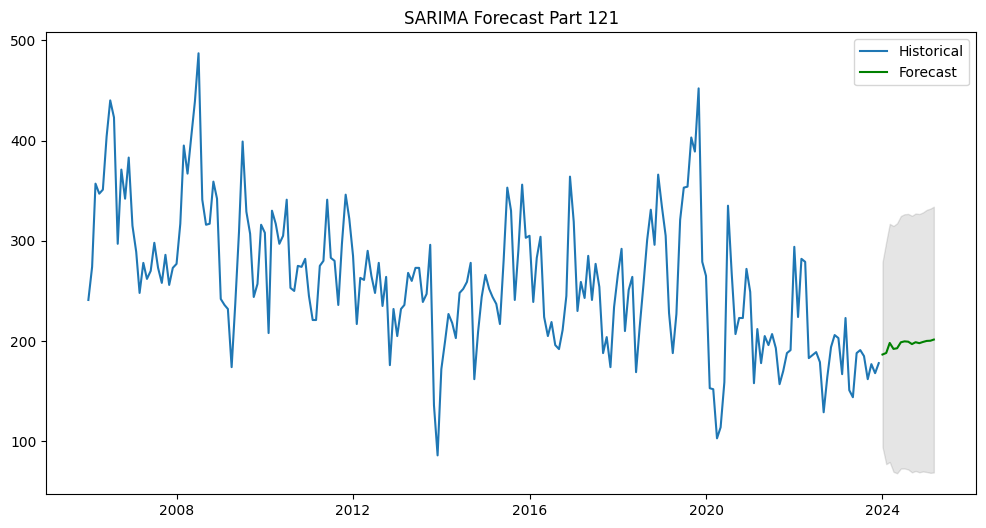

In [ ]:
n_periods = len(test)
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
future_index = pd.date_range(train.index[-1] + pd.offsets.MonthBegin(1), periods=n_periods, freq='MS')
forecast_series = pd.Series(forecast, index=future_index)
plt.figure(figsize=(12,6))
plt.plot(train, label='Historical')
plt.plot(forecast_series, label='Forecast', color='green')
plt.fill_between(future_index, conf_int[:, 0], conf_int[:, 1], color='k', alpha=0.1)
plt.legend()
plt.title('SARIMA Forecast Part 121')
plt.show()

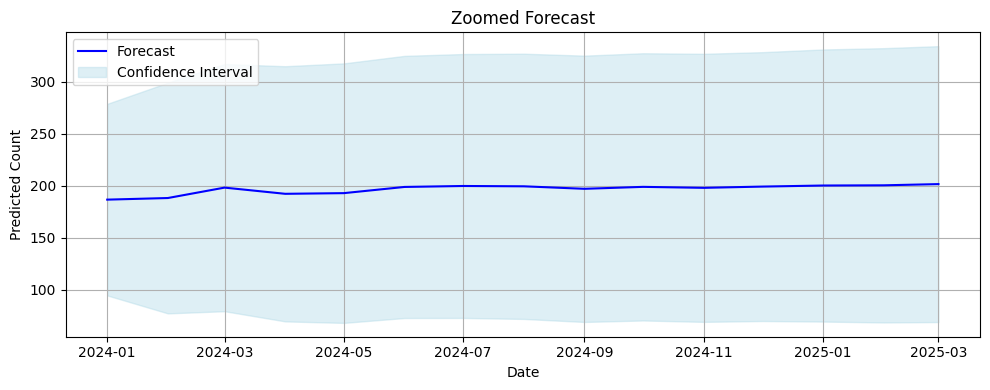

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(forecast_series, label='Forecast', color='blue')
plt.fill_between(forecast_series.index,
                 conf_int[:, 0],
                 conf_int[:, 1],
                 color='lightblue', alpha=0.4, label='Confidence Interval')
plt.title('Zoomed Forecast')
plt.xlabel('Date')
plt.ylabel('Predicted Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


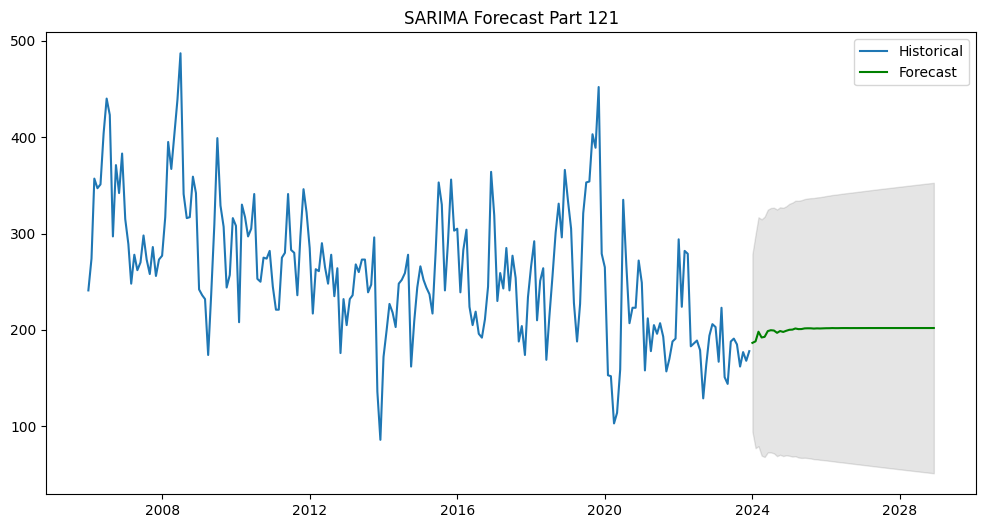

In [ ]:
#5 years into future
n_periods = 5 * 12
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
future_index = pd.date_range(train.index[-1] + pd.offsets.MonthBegin(1), periods=n_periods, freq='MS')
forecast_series = pd.Series(forecast, index=future_index)


plt.figure(figsize=(12,6))
plt.plot(train, label='Historical')
plt.plot(forecast_series, label='Forecast', color='green')
plt.fill_between(future_index, conf_int[:, 0], conf_int[:, 1], color='k', alpha=0.1)
plt.legend()
plt.title('SARIMA Forecast Part 121')
plt.show()

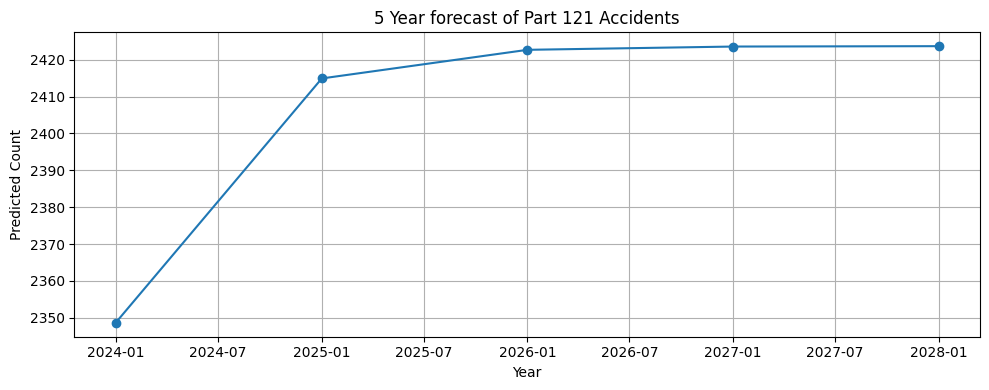

In [ ]:
#binning by year for the next 5 years


forecast_series_yearly = forecast_series.copy()
forecast_series_yearly.index = forecast_series_yearly.index.to_period('Y').to_timestamp()
forecast_by_year = forecast_series_yearly.groupby(forecast_series_yearly.index).sum()

plt.figure(figsize=(10, 4))
plt.plot(forecast_by_year.index, forecast_by_year.values, marker='o', linestyle='-')
plt.title('5 Year forecast of Part 121 Accidents')
plt.xlabel('Year')
plt.ylabel('Predicted Count')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import warnings
warnings.filterwarnings("ignore")

dfsubset4 = dfsubset[(dfsubset['Date']//100 >= 2006) & (dfsubset['Date']//100 <= 2025)]
dfsubset4 = dfsubset4.copy()
dfsubset4['Year'] = dfsubset4['Date']//100
dfsubset4['Month'] = dfsubset4['Date']%100
dfsubset4['Date'] = dfsubset4['Date'].astype(int)
dfsubset4['Date'] = pd.to_datetime(dfsubset4['Date'],format='%Y%m')
dfsubset4['Operating Under FAR Part'] = dfsubset4['Operating Under FAR Part'].astype(str).str.strip()
allowed_far_parts = ['Part 91']
dfsubset4 = dfsubset4[dfsubset4['Operating Under FAR Part'].isin(allowed_far_parts)]
grouped = dfsubset4.groupby(['Date']).size().reset_index(name='count')
grouped.set_index('Date', inplace=True)
y = grouped['count']
train = y[:'2023-12-01']
test = y['2024-01-01':]
model = pm.auto_arima(train,
                      seasonal=True,
                      m=12,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True,
 #                     D=1,
 #                     max_D=1)
)
#the last two lines max_D=1 force the model to take monthly seasonality into account
#without it, the model overrides the seasonality to get a better fit
#I am unsure if we should override this, or whether the model "knows better"
#It seems like we have good reason to expect seasonality
#Maybe we should change to quarterly to see if the model keeps the seasonality
#automatically? I think this would suggest that quarterly seasonality is more natural
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.88 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2012.145, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1900.753, Time=0.56 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1927.480, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2679.237, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1906.268, Time=0.05 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1901.166, Time=3.15 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1903.574, Time=2.71 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1901.917, Time=0.97 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=1903.765, Time=3.03 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1997.277, Time=0.35 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1902.724, Time=1.05 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=1902.728, Time=0.82 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1926.037, Time=0.52 sec
 ARIMA(2,0,1)(1,0,0)[12]

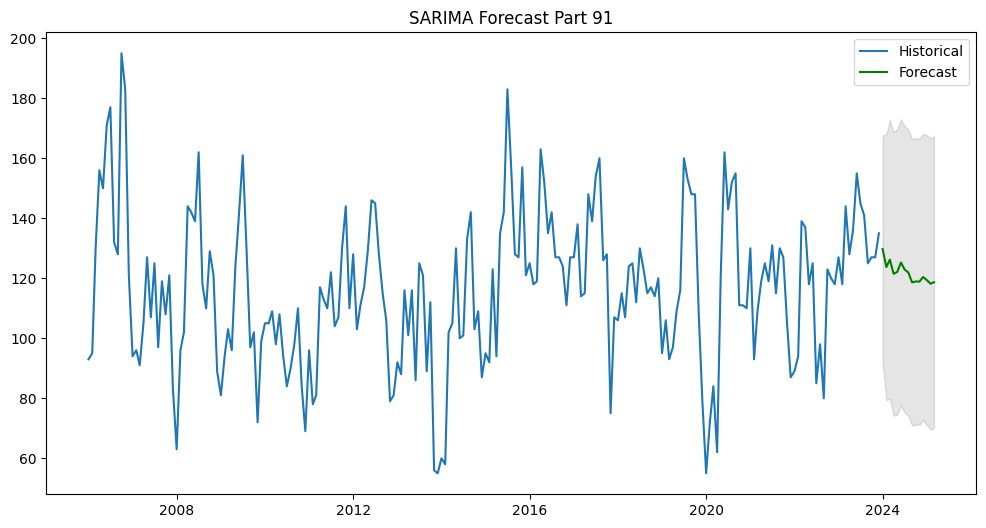

In [ ]:
n_periods = len(test)
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
future_index = pd.date_range(train.index[-1] + pd.offsets.MonthBegin(1), periods=n_periods, freq='MS')
forecast_series = pd.Series(forecast, index=future_index)
plt.figure(figsize=(12,6))
plt.plot(train, label='Historical')
plt.plot(forecast_series, label='Forecast', color='green')
plt.fill_between(future_index, conf_int[:, 0], conf_int[:, 1], color='k', alpha=0.1)
plt.legend()
plt.title('SARIMA Forecast Part 91')
plt.show()

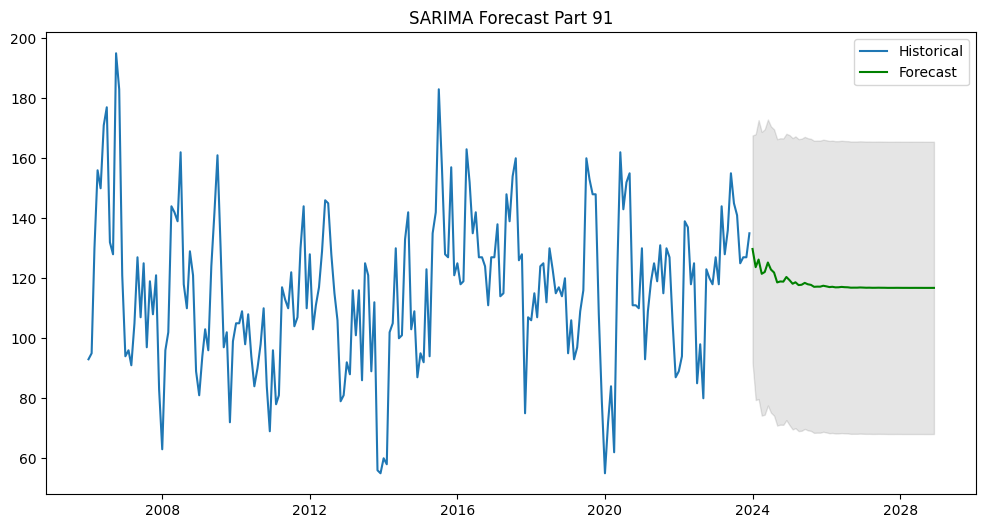

In [ ]:
#5 years into future
n_periods = 5 * 12
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
future_index = pd.date_range(train.index[-1] + pd.offsets.MonthBegin(1), periods=n_periods, freq='MS')
forecast_series = pd.Series(forecast, index=future_index)


plt.figure(figsize=(12,6))
plt.plot(train, label='Historical')
plt.plot(forecast_series, label='Forecast', color='green')
plt.fill_between(future_index, conf_int[:, 0], conf_int[:, 1], color='k', alpha=0.1)
plt.legend()
plt.title('SARIMA Forecast Part 91')
plt.show()

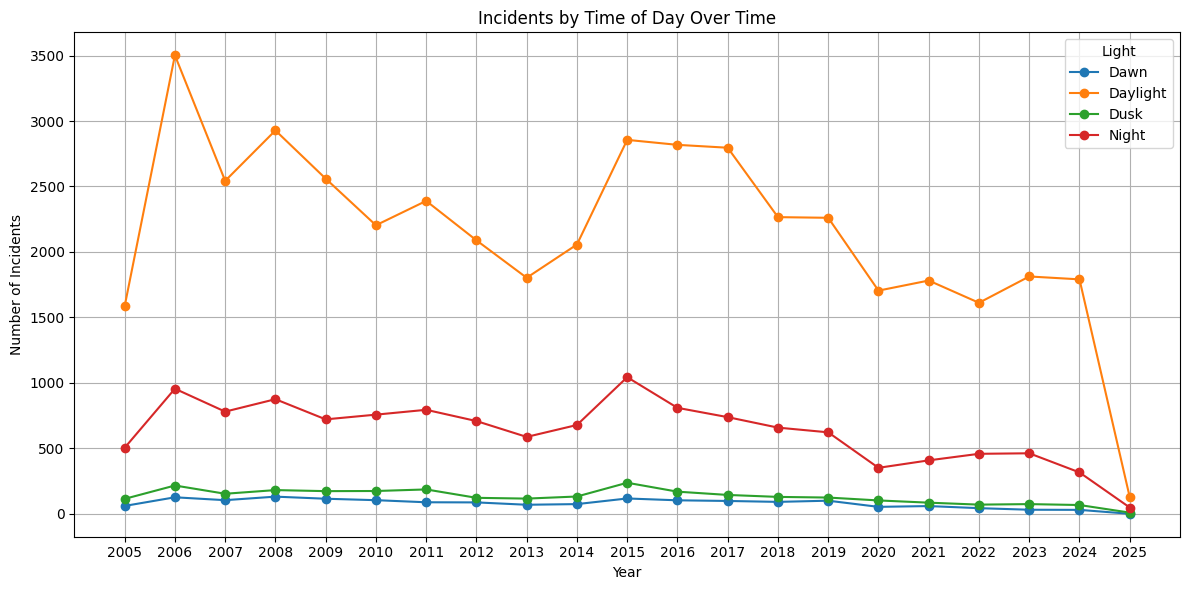

In [30]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

#  looking at trends in the number of aviation incidents from 2005 to the present by plotting the top five light conditions (e.g., Daylight, Night) over time.
top_light_conditions = df_final['Light'].value_counts().nlargest(5).index
filtered = df_final[df_final['Light'].isin(top_light_conditions)].copy()

filtered['Year'] = (pd.to_numeric(filtered['Date'], errors='coerce') // 100).astype('Int64')
current_year = datetime.now().year
filtered = filtered[(filtered['Year'] >= 2005) & (filtered['Year'] <= current_year)]
grouped = filtered.groupby(['Year', 'Light']).size().unstack().fillna(0)
grouped.plot(figsize=(12, 6), marker='o')
plt.title('Incidents by Time of Day Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(ticks=grouped.index, labels=grouped.index.astype(int))
plt.grid(True)
plt.tight_layout()
plt.show()

                                       Aircraft Model  Incident Count
0                               Commercial Fixed Wing            7183
1                                                A320            3870
2                B737 Undifferentiated or Other Model            3360
3                             Skyhawk 172/Cutlass 172            3199
4                                            B757-200            3121
5                                            B737-800            3012
6                                            B737-700            2900
7                                                A319            2717
8                     Regional Jet 200 ER/LR (CRJ200)            2506
9                                   EMB ERJ 145 ER/LR            2345
10                                B767-300 and 300 ER            1963
11                                           B737-300            1710
12                              EMB ERJ 170/175 ER/LR            1687
13  MD-80 Series (DC

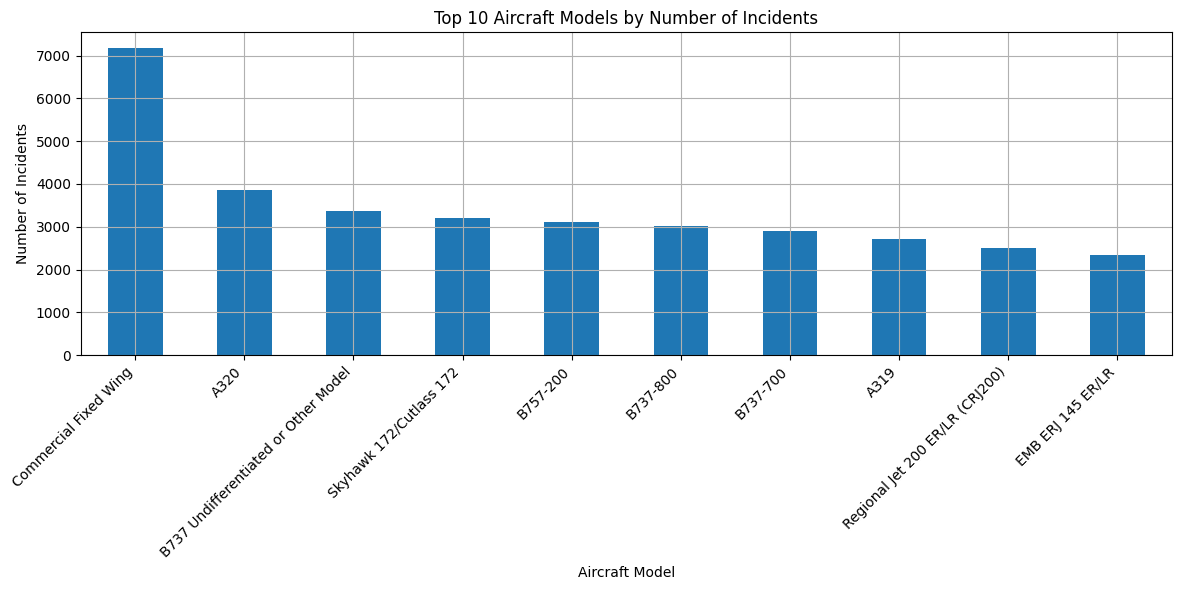

In [7]:


# Drop rows with missing aircraft model
df_filtered = df_final.dropna(subset=["Make Model Name"])

# Count number of incidents by aircraft model
incident_counts = df_filtered["Make Model Name"].value_counts().reset_index()
incident_counts.columns = ["Aircraft Model", "Incident Count"]

# Show the top 20 aircraft models with the most incidents
print(incident_counts.head(20))

import matplotlib.pyplot as plt

incident_counts.head(10).plot(kind='bar', x='Aircraft Model', y='Incident Count', figsize=(12,6), legend=False)
plt.title('Top 10 Aircraft Models by Number of Incidents')
plt.ylabel('Number of Incidents')
plt.xlabel('Aircraft Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()



<ipython-input-8-136232795>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Manufacturer'] = df_filtered['Make Model Name'].apply(get_manufacturer)


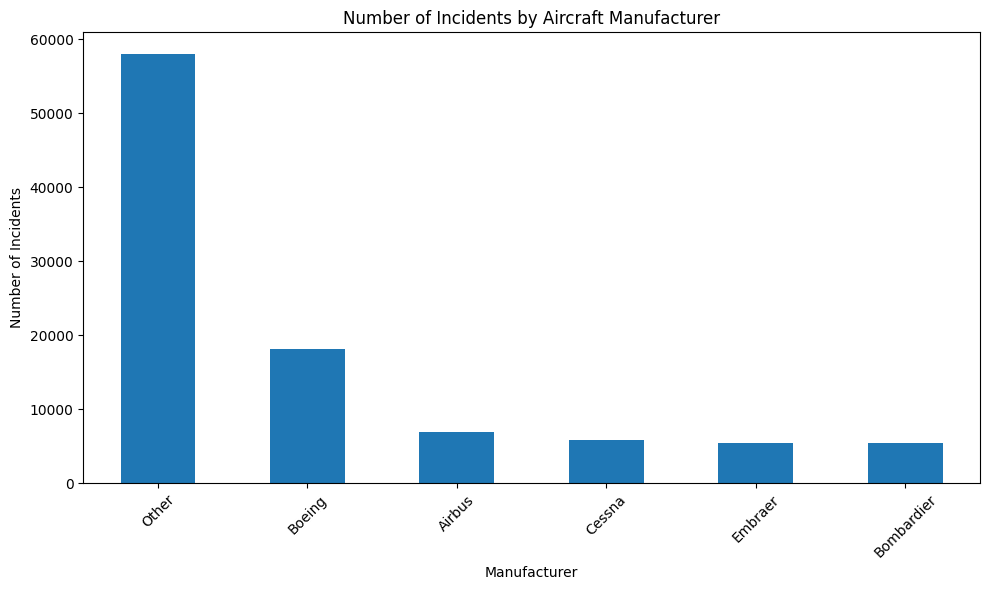

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the manufacturer extraction function
def get_manufacturer(model):
    if pd.isna(model):
        return 'Unknown'
    model = model.upper()
    if 'BOEING' in model or 'B737' in model or 'B757' in model or 'B787' in model:
        return 'Boeing'
    elif 'AIRBUS' in model or 'A320' in model or 'A319' in model:
        return 'Airbus'
    elif 'EMB' in model or 'EMBRAER' in model:
        return 'Embraer'
    elif 'CRJ' in model or 'REGIONAL JET' in model:
        return 'Bombardier'
    elif 'CESSNA' in model or 'SKYHAWK' in model:
        return 'Cessna'
    else:
        return 'Other'

df_filtered['Manufacturer'] = df_filtered['Make Model Name'].apply(get_manufacturer)

manufacturer_counts = df_filtered['Manufacturer'].value_counts()

plt.figure(figsize=(10,6))
manufacturer_counts.plot(kind='bar')
plt.title('Number of Incidents by Aircraft Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()